In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## I - Exploration et Analyse descriptive (EDA)

In [2]:
data = pd.read_csv("../Datasets/data.csv")
data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [3]:
data.shape

(64000, 9)

### Type de variables

In [4]:
data.dtypes

recency            int64
history          float64
used_discount      int64
used_bogo          int64
zip_code          object
is_referral        int64
channel           object
offer             object
conversion         int64
dtype: object

### Description des données

In [5]:
data.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.describe(include=[object])

,zip_code,channel,offer
count,64000,64000,64000
unique,3,3,3
top,Surburban,Web,Buy One Get One
freq,28776,28217,21387


### zip_code Vs conversion

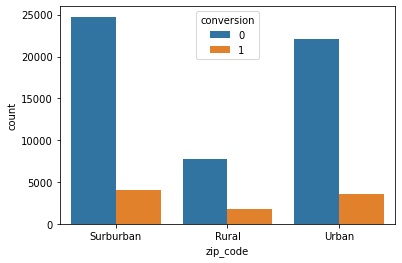

conversion,0,1
zip_code,,
Rural,0.811879,0.188121
Surburban,0.860057,0.139943
Urban,0.860956,0.139044


In [7]:
sns.countplot(x= "zip_code", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('zip_code')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

### channel Vs conversion

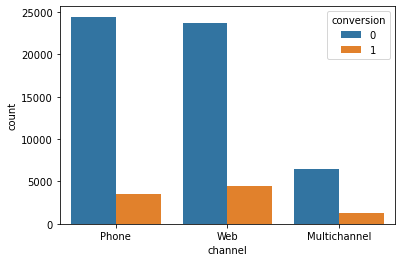

conversion,0,1
channel,,
Multichannel,0.828266,0.171734
Phone,0.872845,0.127155
Web,0.840593,0.159407


In [8]:
sns.countplot(x= "channel", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('channel')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

### offer Vs conversion

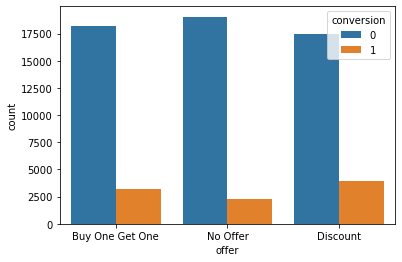

conversion,0,1
offer,,
Buy One Get One,0.848600,0.151400
Discount,0.817243,0.182757
No Offer,0.893833,0.106167


In [9]:
sns.countplot(x= "offer", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('offer')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

## used_discount Vs conversion

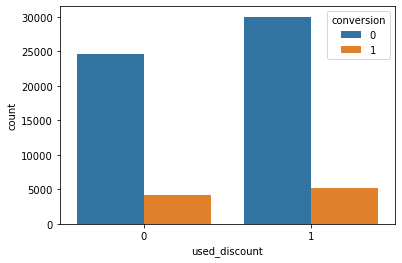

conversion,0,1
used_discount,,
0,0.855850,0.144150
1,0.851075,0.148925


In [10]:
sns.countplot(x= "used_discount", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('used_discount')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

### used_bogo Vs conversion 

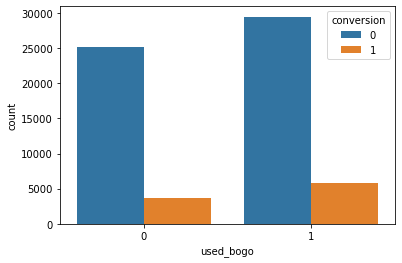

conversion,0,1
used_bogo,,
0,0.873551,0.126449
1,0.836564,0.163436


In [11]:
sns.countplot(x= "used_bogo", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('used_bogo')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

### is_referral Vs conversion

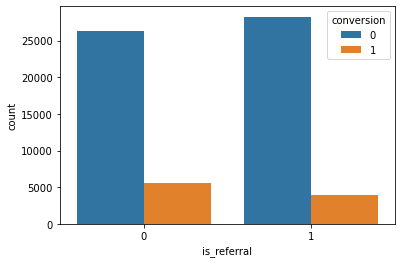

conversion,0,1
is_referral,,
0,0.826940,0.173060
1,0.879262,0.120738


In [12]:
sns.countplot(x= "is_referral", hue="conversion", data=data);
plt.xticks()
plt.show()
data.groupby('is_referral')["conversion"].value_counts(normalize=True).unstack(fill_value=0)

## II - Imputation

### Detection des données manquantes

In [13]:
miss = data.isna().sum().sort_values(ascending = False)
miss_per = (miss/len(data))*100

pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
recency,0,0.0
history,0,0.0
used_discount,0,0.0
used_bogo,0,0.0
zip_code,0,0.0
is_referral,0,0.0
channel,0,0.0
offer,0,0.0
conversion,0,0.0


On remarque qu'il n'y a pas de données manquantes dans ce dataset. L'on ne va donc pas faire l'imputation.

## III - Detection et Traitement des outliers

#### Detection des données abérrantes

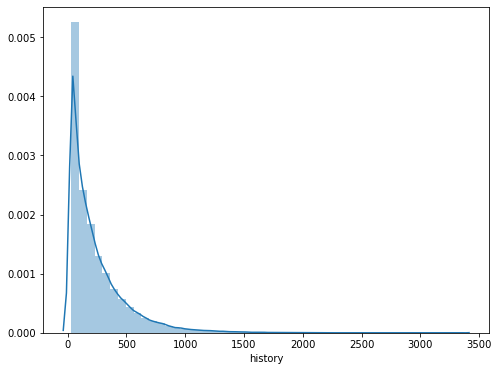

In [14]:
plt.figure(figsize=(8, 6))
sns.distplot(data["history"])
plt.show()

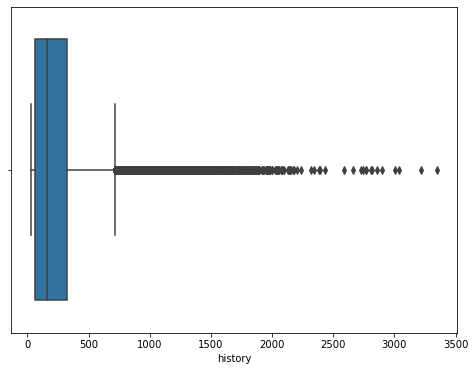

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data["history"])
plt.show()

La variable **history**, représentant les depenses des clients, contient de données abérrantes.

In [16]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [17]:
outliers = data.loc[detect_outliers(data,['history'])]
outliers.head()

<ipython-input-17-d45ac7aca09c>:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  outliers = data.loc[detect_outliers(data,['history'])]


,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
19,5,828.42,1,0,Surburban,1,Multichannel,Discount,0
37,4,766.47,1,1,Urban,1,Multichannel,Discount,0
47,1,729.70,1,1,Surburban,1,Web,Discount,0
69,10,1009.44,1,0,Surburban,1,Multichannel,Buy One Get One,0
83,2,809.07,1,0,Urban,1,Phone,Discount,0


In [18]:
percent = round((len(outliers)/len(data))*100, 2)
print("Il y a {}% de données abérrantes dans le dataset".format(percent))

Il y a 5.61% de données abérrantes dans le dataset


#### Traitement de données abérrantes (Suppression)

In [19]:
outliers_list = list(detect_outliers(data,['history']).keys()) #To drop

new_data = data.drop(outliers_list, axis=0)

## IV - Encodage des données

#### Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder_zip = LabelEncoder()
new_data["zip_code"] = encoder_zip.fit_transform(new_data["zip_code"])

In [22]:
encoder_channel = LabelEncoder()
new_data["channel"] = encoder_channel.fit_transform(new_data["channel"])

In [23]:
encoder_offer = LabelEncoder()
new_data["offer"] = encoder_offer.fit_transform(new_data["offer"])

In [24]:
new_data.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,1,0,1,0,0
1,6,329.08,1,1,0,1,2,2,0
2,7,180.65,0,1,1,1,2,0,0
3,9,675.83,1,0,0,1,2,1,0
4,2,45.34,1,0,2,0,2,0,0


#### Dummies

In [25]:
#datazip = data[["zip_code", "channel", "offer"]]
#dum_df = pd.get_dummies(datazip, columns=["zip_code", "channel", "offer"], prefix=["zip_code_is", "channel_is", 'offer_is'])
#data = data.join(dum_df)

In [26]:
#data = data.drop(["zip_code", "channel", "offer"], axis=1)
#data.head()

## VI - Data Balancing

In [27]:
51731 / (51731 + 8676)*100

85.63742612611122

In [28]:
new_data["conversion"].value_counts()

0    51731
1     8676
Name: conversion, dtype: int64

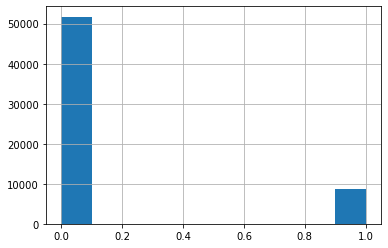

In [29]:
new_data["conversion"].hist()

On est en présence d'un deséquilibre de classes(Unbalanced Data). D'où, l'on doit faire une augmentation de données.

In [30]:
y = new_data["conversion"]
X = new_data.drop(["conversion"], axis=1)

In [31]:
cols = list(X.columns)
cols

['recency',
 'history',
 'used_discount',
 'used_bogo',
 'zip_code',
 'is_referral',
 'channel',
 'offer']

In [32]:
X = X.to_numpy()
y = y.to_numpy()

In [33]:
#Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label

Counter({0: 51731, 1: 8676})
Counter({0: 51731, 1: 51731})


In [45]:
df = pd.DataFrame(X, columns = cols)
df['conversion']=y
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10.0,142.44,1.0,0.0,1.0,0.0,1.0,0.0,0
1,6.0,329.08,1.0,1.0,0.0,1.0,2.0,2.0,0
2,7.0,180.65,0.0,1.0,1.0,1.0,2.0,0.0,0
3,9.0,675.83,1.0,0.0,0.0,1.0,2.0,1.0,0
4,2.0,45.34,1.0,0.0,2.0,0.0,2.0,0.0,0


In [48]:
df.shape

(103462, 9)

In [42]:
new_data.shape

(60407, 9)

## V - Normalisation :  MinMax

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

df[cols] = scaler.fit_transform(df[cols])

In [47]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,0.818182,0.163647,1.0,0.0,0.5,0.0,0.5,0.0,0
1,0.454545,0.435262,1.0,1.0,0.0,1.0,1.0,1.0,0
2,0.545455,0.219253,0.0,1.0,0.5,1.0,1.0,0.0,0
3,0.727273,0.939882,1.0,0.0,0.0,1.0,1.0,0.5,0
4,0.090909,0.022339,1.0,0.0,1.0,0.0,1.0,0.0,0


In [49]:
df.to_csv("data_cleaned.csv", index=False)